In [2]:
import sys
sys.path.insert(1, './lib/python3.7/site-packages')
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()

In [3]:
data=pd.read_csv('amazon.csv',thousands='.')
data.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2008-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [4]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [5]:
import numpy as np
data=data.replace(0,np.nan)
data2 = data.dropna(subset=['number'])

In [6]:
forest_fire_per_month = data2.groupby('month')['number'].sum()
months_unique = list(data.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0)

In [7]:
forest_fire_per_month = forest_fire_per_month.to_frame()

In [8]:
forest_fire_per_month.reset_index(level=0, inplace=True)
forest_fire_per_month

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Mar�o,35118.0
3,Abril,28364.0
4,Maio,46083.0
5,Junho,111405.0
6,Julho,217620.0
7,Agosto,740841.0
8,Setembro,1015925.0
9,Outubro,629665.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

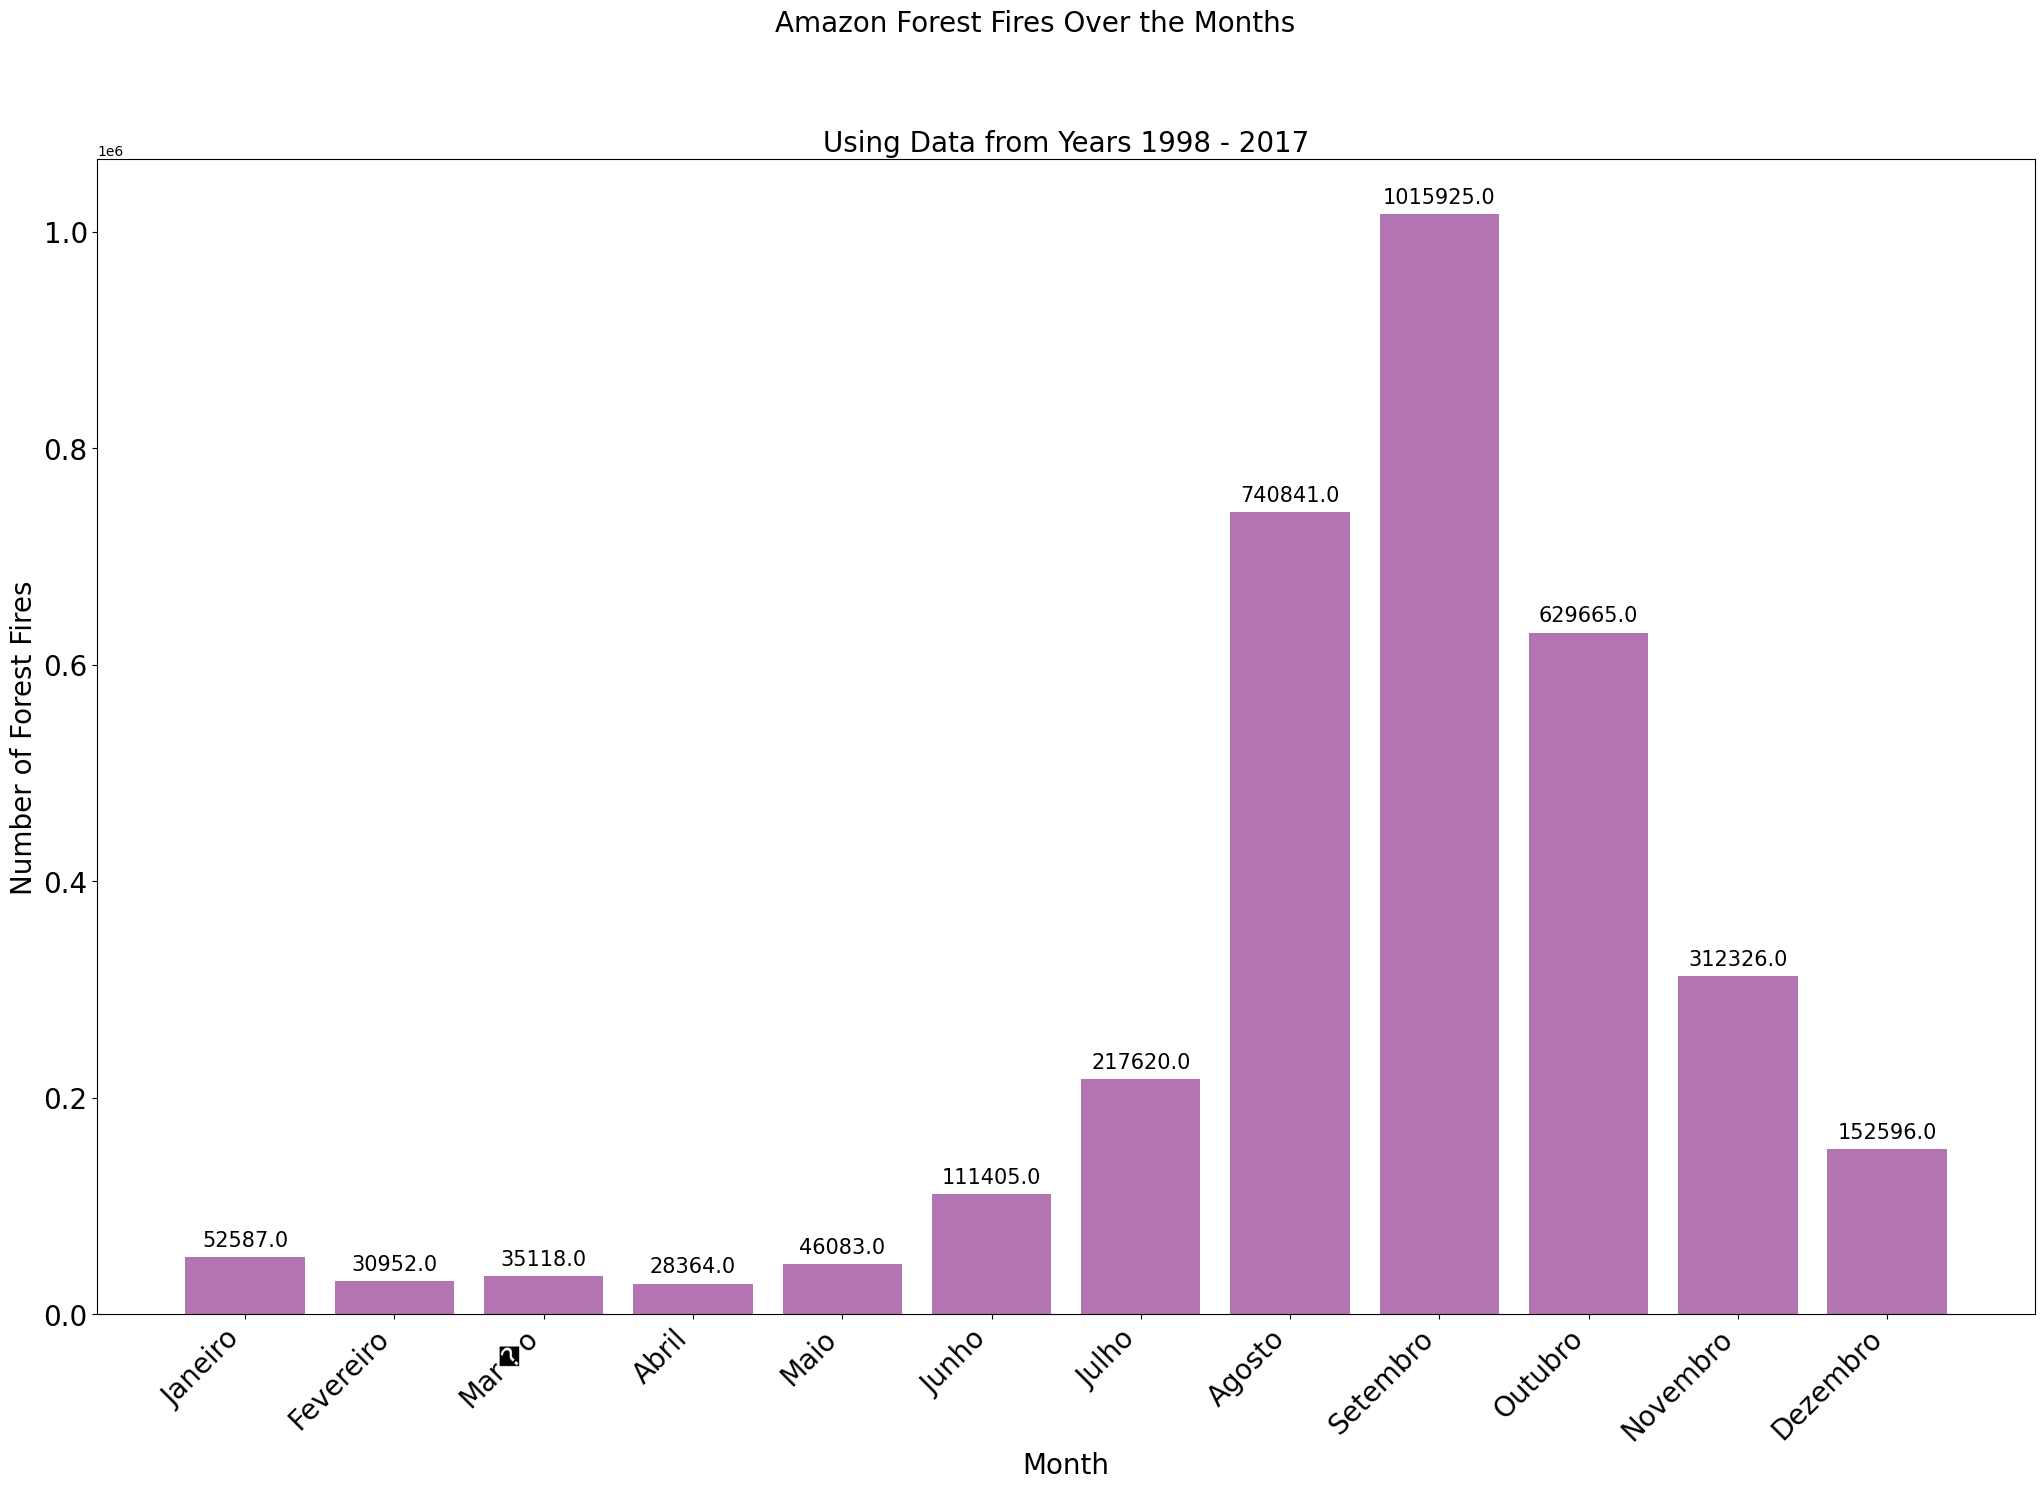

In [9]:
plt.figure(figsize=(25, 15)) 
plt.bar(
forest_fire_per_month['month'],
forest_fire_per_month['number'], 
color = (0.5,0.1,0.5,0.6)) 
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20)
plt.title('Using Data from Years 1998 - 2017', fontsize=20)
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15)
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)